# LAHMC Paper results

In [1]:
include("lahmc.jl")
include("run_lahmc.jl")

sample_loop (generic function with 1 method)

# Rough Well

In [2]:
n_samples = 200
n_chains = 100
epsilon = 1
L = 10
beta = 0.1
n_param = 2

rw = Rough_Well(2, 100, 4)

function U(X)
    return U_rough_well(X, rw)
end

function dU(X)
    return dU_rough_well(X, rw)
end
function init_q()
    return init_rough_well(rw)
end

init_q (generic function with 1 method)

Average acceptance rate: 0.6963316582914574
Average transition rates: L1: 0.5438693467336684 L2: 0.09582914572864322 L3: 0.037336683417085424 L4: 0.019296482412060303 F: 0.30366834170854273
Average acceptance rate: 0.5500502512562814
Average transition rates: L1: 0.5500502512562814 F: 0.44994974874371857


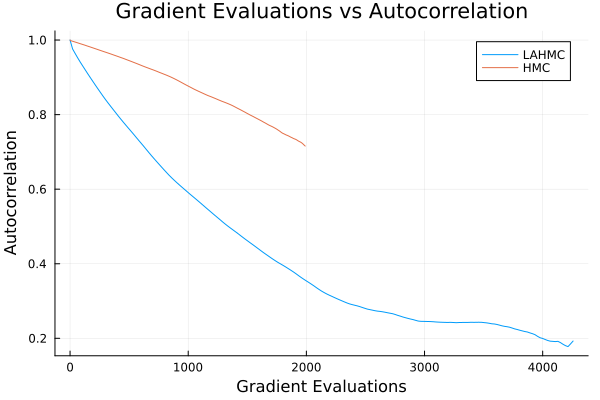

In [3]:
lahmc_samples, grad_count = sample_loop(n_chains, U, dU, init_q, epsilon, L, 4, beta, n_param, n_samples)
autocorrelation_lahmc = calculate_looped_autocorrelation(lahmc_samples)

gradient_evaluations_lahmc = LinRange(0, grad_count/n_chains, length(autocorrelation_lahmc))

plt_lahmc_ac = plot(gradient_evaluations_lahmc, autocorrelation_lahmc, title="Gradient Evaluations vs Autocorrelation", xlabel="Gradient Evaluations", ylabel="Autocorrelation", label="LAHMC")

hmc_samples, grad_count = sample_loop(n_chains, U, dU, init_q, epsilon, L, 1, beta, n_param, n_samples)
autocorrelation_hmc = calculate_looped_autocorrelation(hmc_samples)

gradient_evaluations_hmc = LinRange(0, grad_count/n_chains, length(autocorrelation_hmc))

plt_hmc_ac = plot!(gradient_evaluations_hmc, autocorrelation_hmc, label="HMC")

display(plt_lahmc_ac)

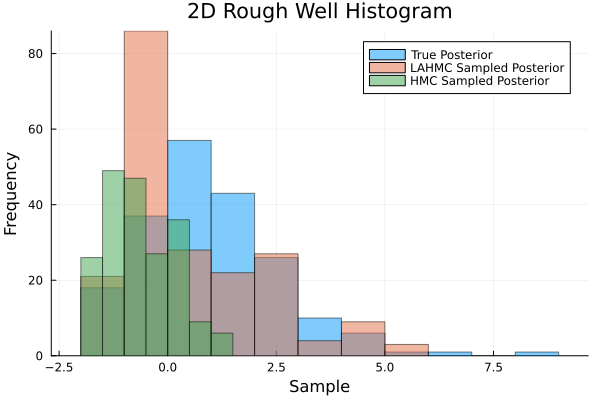

In [4]:
plot_histograms(U, init_q, lahmc_samples, n_samples, "2D Rough Well Histogram"; hmc_samples=hmc_samples)

# 2D ill-conditioned Gaussian

In [5]:
n_samples = 1000
n_chains = 50
epsilon = 1
L = 10
beta = 0.1
n_param = 2

gauss_2d = Gaussian(2, 6)

function U(X)
    return U_gaussian(X, gauss_2d)
end

function dU(X)
    return dU_gaussian(X, gauss_2d)
end
function init_q()
    return init_gaussian(gauss_2d)
end

init_q (generic function with 1 method)

Average acceptance rate: 1.0
Average transition rates: L1: 0.9209609609609609 L2: 0.03381381381381381 L3: 0.04522522522522523 L4: 0.0 F: 0.0
Average acceptance rate: 0.9230630630630631
Average transition rates: L1: 0.9230630630630631 F: 0.07693693693693694


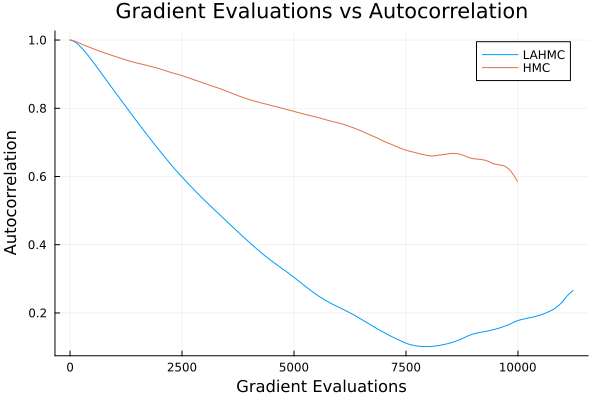

In [6]:
lahmc_samples, grad_count = sample_loop(n_chains, U, dU, init_q, epsilon, L, 4, beta, n_param, n_samples)
autocorrelation_lahmc = calculate_looped_autocorrelation(lahmc_samples)

gradient_evaluations_lahmc = LinRange(0, grad_count/n_chains, length(autocorrelation_lahmc))

plt_lahmc_ac = plot(gradient_evaluations_lahmc, autocorrelation_lahmc, title="Gradient Evaluations vs Autocorrelation", xlabel="Gradient Evaluations", ylabel="Autocorrelation", label="LAHMC")

hmc_samples, grad_count = sample_loop(n_chains, U, dU, init_q, epsilon, L, 1, beta, n_param, n_samples)
autocorrelation_hmc = calculate_looped_autocorrelation(hmc_samples)

gradient_evaluations_hmc = LinRange(0, grad_count/n_chains, length(autocorrelation_hmc))

plt_hmc_ac = plot!(gradient_evaluations_hmc, autocorrelation_hmc, label="HMC")

display(plt_lahmc_ac)


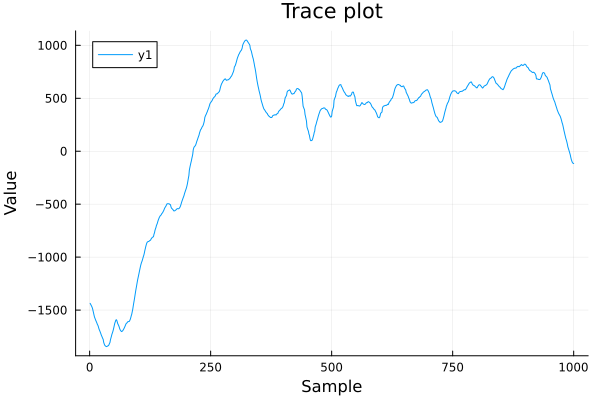

In [7]:
plot(lahmc_samples[1, 1, :], title="Trace plot", xlabel="Sample", ylabel="Value")

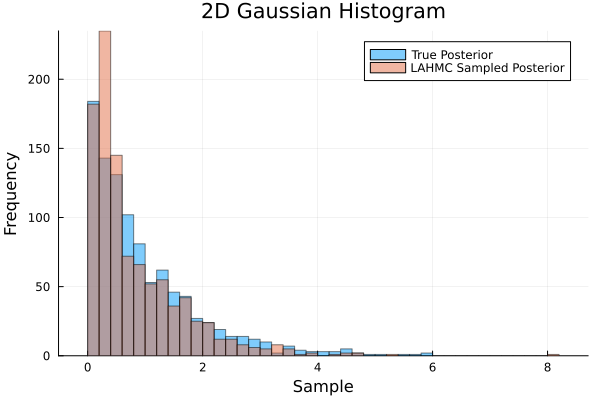

In [8]:
plot_histograms(U, init_q, lahmc_samples, n_samples, "2D Gaussian Histogram")

# 100D ill-conditioned Gaussian

In [9]:
n_samples = 1000
n_chains = 50
epsilon = 1
L = 10
beta = 0.1
n_param = 100

gauss_2d = Gaussian(100, 6)

function U(X)
    return U_gaussian(X, gauss_2d)
end

function dU(X)
    return dU_gaussian(X, gauss_2d)
end
function init_q()
    return init_gaussian(gauss_2d)
end

init_q (generic function with 1 method)

Average acceptance rate: 0.951851851851852
Average transition rates: L1: 0.8512312312312312 L2: 0.05927927927927928 L3: 0.03515515515515515 L4: 0.006186186186186186 F: 0.04814814814814815
Average acceptance rate: 0.8554354354354355
Average transition rates: L1: 0.8554354354354354 F: 0.14456456456456457


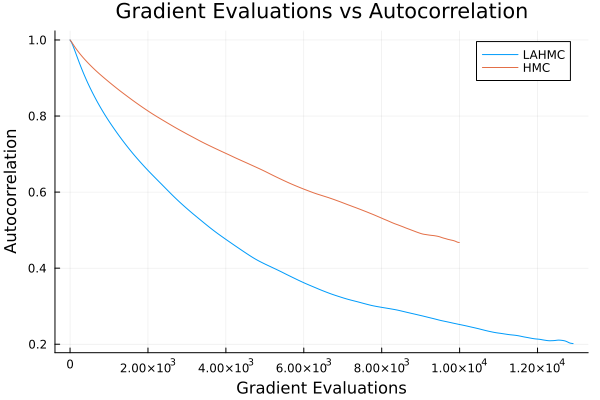

In [10]:
lahmc_samples, grad_count = sample_loop(n_chains, U, dU, init_q, epsilon, L, 4, beta, n_param, n_samples)
autocorrelation_lahmc = calculate_looped_autocorrelation(lahmc_samples)

gradient_evaluations_lahmc = LinRange(0, grad_count/n_chains, length(autocorrelation_lahmc))

plt_lahmc_ac = plot(gradient_evaluations_lahmc, autocorrelation_lahmc, title="Gradient Evaluations vs Autocorrelation", xlabel="Gradient Evaluations", ylabel="Autocorrelation", label="LAHMC")

hmc_samples, grad_count = sample_loop(n_chains, U, dU, init_q, epsilon, L, 1, beta, n_param, n_samples)
autocorrelation_hmc = calculate_looped_autocorrelation(hmc_samples)

gradient_evaluations_hmc = LinRange(0, grad_count/n_chains, length(autocorrelation_hmc))

plt_hmc_ac = plot!(gradient_evaluations_hmc, autocorrelation_hmc, label="HMC")

display(plt_lahmc_ac)


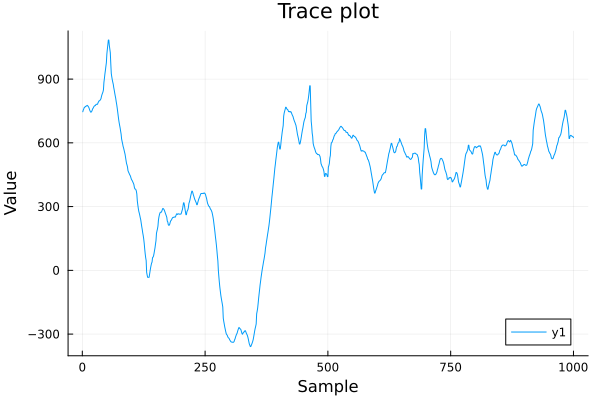

In [11]:
plot(lahmc_samples[1, 1, :], title="Trace plot", xlabel="Sample", ylabel="Value")

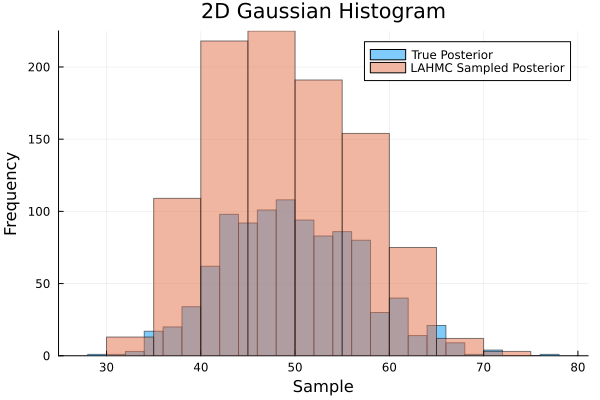

In [12]:
plot_histograms(U, init_q, lahmc_samples, n_samples, "2D Gaussian Histogram")